# Chapter2. 机器学习分类算法

In [3]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p numpy,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Sebastian Raschka 
last updated: 2018-10-03 

CPython 3.7.0
IPython 6.5.0

numpy 1.15.2
pandas 0.23.4
matplotlib 3.0.0


## 1. 感知机分类算法

In [5]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        # 初始化权重向量，加入偏置
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """计算感知机输入"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """根据输入，判断感知机输出"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

在iris数据集上训练感知机

In [6]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
# 显示末尾的几条数据
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


根据数据集绘制散点图

In [7]:
import matplotlib.pyplot as plt

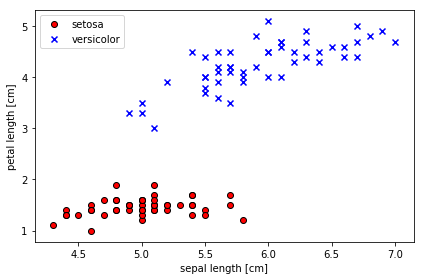

In [8]:
# iloc方法返回DataFrame指定行列的值，返回对象是Series
# 如果要返回numpy.array对象，使用values方法即可
y = df.iloc[0:100, 4].values
# 二值化
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='r', edgecolors='black', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

训练感知机模型

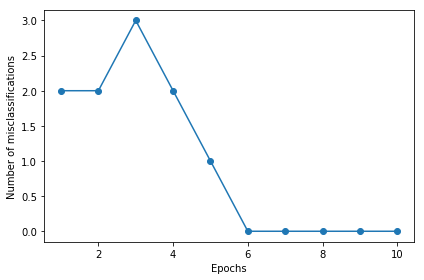

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

# 绘制误差变化曲线，横坐标为迭代次数，纵坐标为误分类的点
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
plt.show()

从上面可以看到，当迭代次数达到6次后，感知机模型收敛，误分类点的个数为0，表明感知机完全将两类样本分开。<br>
下面绘制决策边界：

In [12]:
# ListedColormap通过列表来生成一组颜色列表
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # 设置标记点的形状和绘图所用的颜色列表
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # 生成颜色列表，np.unique返回y中类别个数
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 生成采样点，这是一个固定范式，可以记一下，以后都有用
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 使用分类器对上述采样点产生输出
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 产生的输出是一维的，重新变成二维数据，下面绘制等高线颜色的时候需要Z和xx1,xx2维度相同
    # 至于Z中的数据，Z[0, 0] = [xx1[0], xx2[0]], Z[0, 1] = [xx1[0], xx2[1]]，以此类推。
    Z = Z.reshape(xx1.shape)
    
    # 对不同的xx1和xx2的预测结果绘制出不同的颜色
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # 绘制样本数据
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, edgecolors='black', color=cmap(idx), marker=markers[idx], label=cl)

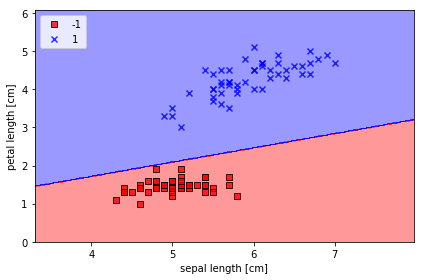

In [13]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## 2. 自适应线性神经元及其学习的收敛性
自适应线性神经元不同于前面感知机基于误分类点的优化方法，它是基于代价函数的最小化来完成收敛的。通过对代价函数求梯度并更新权重值来完成最优化。

In [14]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """拟合数据
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            输入数据
        y : array-like, shape = [n_samples]
            输出数据

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            # 计算输出
            output = self.net_input(X)
            # 计算输出值和实际值的误差
            errors = (y - output)
            # 更新权重，后面X.T.dot(errors)是求解代价函数梯度得到的项
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # 计算代价函数
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """计算模型线性输出"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """计算线性激励"""
        return self.net_input(X)
    
    def predict(self, X):
        """根据输入值判断返回类别"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

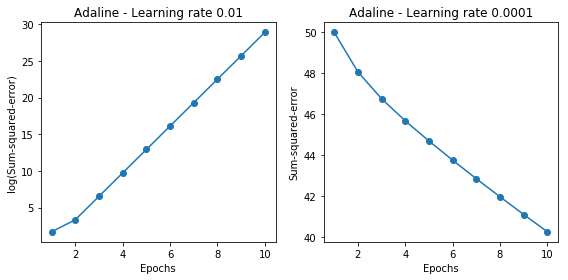

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# 使用不同学习速率进行测试，查看收敛情况
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
# 为了使坐标轴统一在一个范围，使用log10进行处理代价
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.tight_layout()
plt.show()

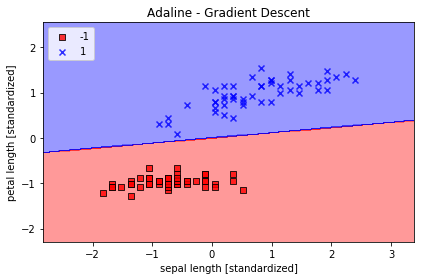

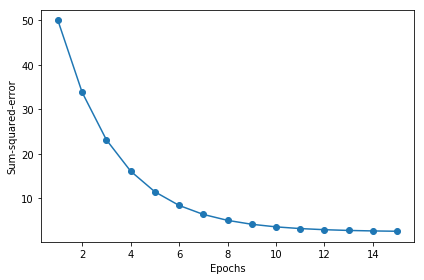

In [16]:
# 标准化数据
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std() 

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

## 3. 大规模机器学习与随机梯度下降
使用随机梯度下降或者在线梯度下降替代批量梯度下降，以解决在大数据集情况下算法收敛速度的问题。

In [17]:
from numpy.random import seed

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
            
    def fit(self, X, y):
        """拟合数据"""
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                # 随机化训练数据
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                # 使用单个样本计算并更新权重并计算代价
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """"""
        if not self.w_initialized:
            # 如果没有初始化权重向量，则初始化
            # 初始化后的向量不会重置
            self._initialize_weights(X.shape[1])
        # 如果数据集长度大于一，那么使用一个样本更新
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        pass
    
    def _shuffle(self, X, y):
        """随机化数据集"""
        # permutation方法随机打乱一个长度为len(y)的数组
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """初始化权重向量为0"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """使用Adaline算法更新权重"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[0] += self.eta * error
        self.w_[1:] += self.eta * xi.dot(error)
        cost = 0.5 * error ** 2
        # 返回更新完毕的代价函数，此时权重已经被更新，无需返回
        return cost
    
    def net_input(self, X):
        """计算模型线性输出"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """计算线性激励"""
        return self.net_input(X)
    
    def predict(self, X):
        """根据输入值判断返回类别"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

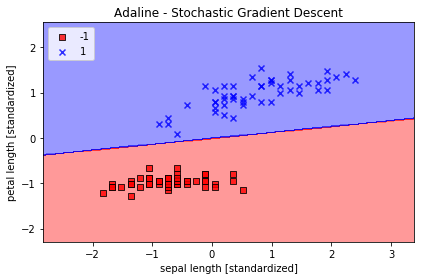

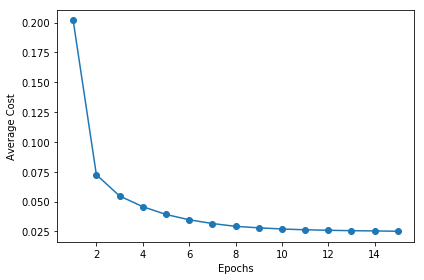

In [18]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()